In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [18]:
def drop_indef(dataframe, coluna):
    return dataframe[dataframe[coluna] != 'indef']

def convert_to_datetime(dataframe, coluna_data):
    return pd.to_datetime(dataframe[coluna_data])

def get_recent_reviews(dataframe, coluna_data='data_avaliacao', ano=2014):
    df_without_indef = drop_indef(dataframe, coluna_data)
    df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)
    return df_without_indef[df_without_indef[coluna_data].dt.year > ano]

In [19]:
hoteis = pd.read_csv('Ouro Preto e Mariana/hoteis.csv').drop_duplicates()
restaurantes = pd.read_csv('Ouro Preto e Mariana/restaurantes.csv').drop_duplicates()
atracoes = pd.read_csv('Ouro Preto e Mariana/atracoes.csv').drop_duplicates()
print(str(hoteis.shape[0]) + ' hoteis')
print(str(restaurantes.shape[0]) + ' restaurantes')
print(str(atracoes.shape[0]) + ' atracoes')

284 hoteis
547 restaurantes
168 atracoes


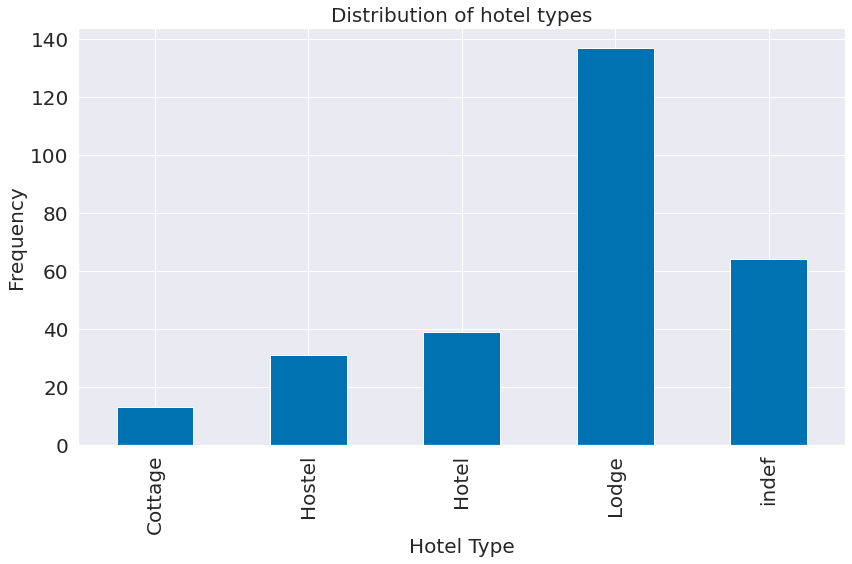

In [20]:
tipos_hoteis = hoteis.groupby('tipo')['nome'].count().rename({'Chale': 'Cottage', 'Hostel': 'Hostel', 'Hotel':'Hotel', 'Pousada': 'Lodge', 'indef':'indef'})
tipos_hoteis.plot.bar()
plt.xlabel('Hotel Type')
plt.ylabel('Frequency')
plt.title('Distribution of hotel types')
plt.tight_layout()
plt.savefig('graficos/en-grafico1.png')

In [21]:
avaliacoes_hoteis = pd.read_csv('Ouro Preto e Mariana/avaliacoes-hoteis.csv').drop_duplicates()
avaliacoes_restaurantes = pd.read_csv('Ouro Preto e Mariana/avaliacoes-restaurantes.csv').drop_duplicates()
avaliacoes_atracoes = pd.read_csv('Ouro Preto e Mariana/avaliacoes-atracoes.csv', error_bad_lines=False).drop_duplicates()
print(str(avaliacoes_hoteis.shape[0]) + ' avaliacoes de hoteis')
print(str(avaliacoes_restaurantes.shape[0]) + ' avaliacoes de restaurantes')
print(str(avaliacoes_atracoes.shape[0]) + ' avaliacoes de atracoes')

18845 avaliacoes de hoteis
11094 avaliacoes de restaurantes
31988 avaliacoes de atracoes
b'Skipping line 2972: expected 10 fields, saw 14\nSkipping line 12553: expected 10 fields, saw 11\nSkipping line 13676: expected 10 fields, saw 11\nSkipping line 20397: expected 10 fields, saw 11\nSkipping line 20884: expected 10 fields, saw 11\nSkipping line 21048: expected 10 fields, saw 11\nSkipping line 21757: expected 10 fields, saw 11\nSkipping line 26818: expected 10 fields, saw 11\nSkipping line 30765: expected 10 fields, saw 16\nSkipping line 31449: expected 10 fields, saw 15\n'


In [22]:
avaliacoes_hoteis_recentes = get_recent_reviews(avaliacoes_hoteis)

avaliacoes_restaurantes_recentes = get_recent_reviews(avaliacoes_restaurantes)

avaliacoes_atracoes_recentes = get_recent_reviews(avaliacoes_atracoes)

<ipython-input-18-033d91acdcbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)
<ipython-input-18-033d91acdcbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


In [23]:
#gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'])['estabelecimento']                                
comentarios_por_mes_hoteis = avaliacoes_hoteis_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_hoteis = gb.count()

#gb = avaliacoes_restaurantes_recentes.groupby([avaliacoes_restaurantes_recentes['data_avaliacao'].dt.year,
#                                            avaliacoes_restaurantes_recentes['data_avaliacao'].dt.month])['estabelecimento']                                
comentarios_por_mes_restaurantes = avaliacoes_restaurantes_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_restaurantes = gb.count()

#gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'])['estabelecimento']
comentarios_por_mes_atracoes = avaliacoes_atracoes_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_atracoes = gb.count()

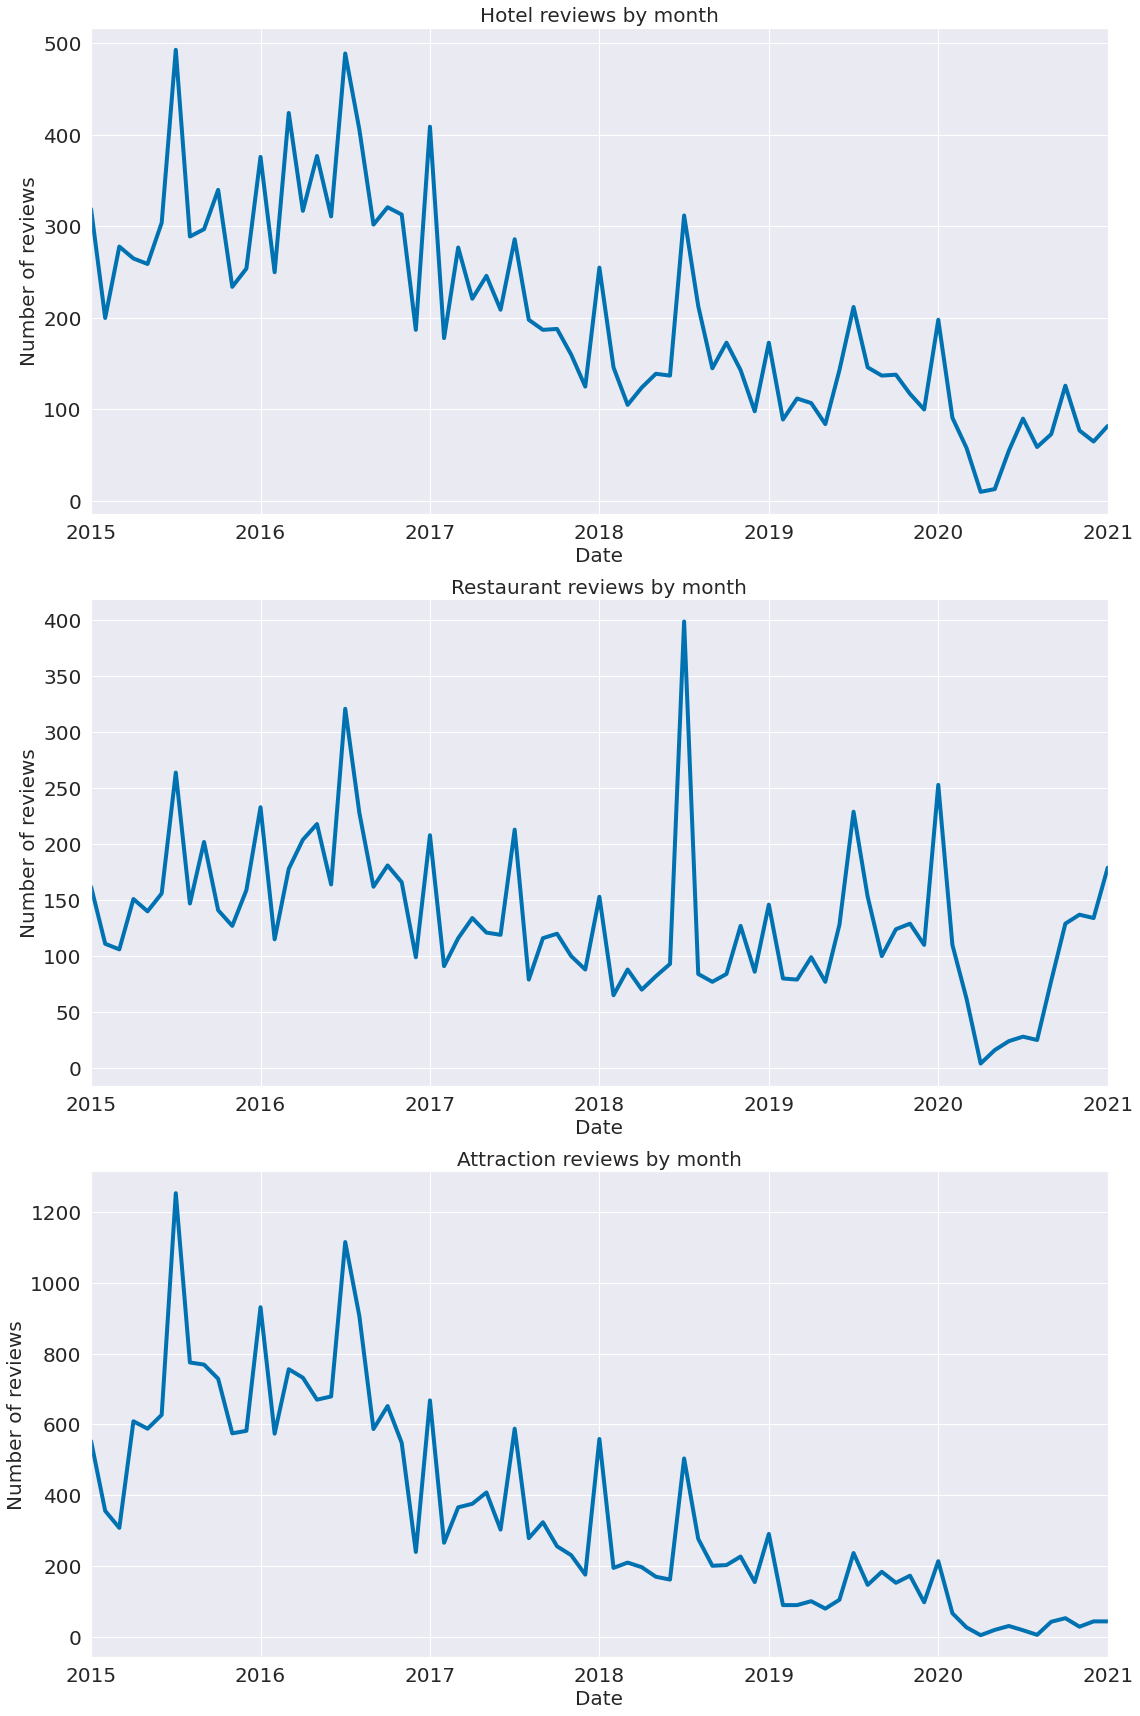

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16, 24))

comentarios_por_mes_hoteis.plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title("Hotel reviews by month")
comentarios_por_mes_restaurantes.plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title("Restaurant reviews by month")
comentarios_por_mes_atracoes.plot(ax=ax3)
ax3.set(xlabel='Date', ylabel='Number of reviews')
ax3.set_title("Attraction reviews by month")

plt.tight_layout()
plt.savefig('graficos/en-grafico2.png')

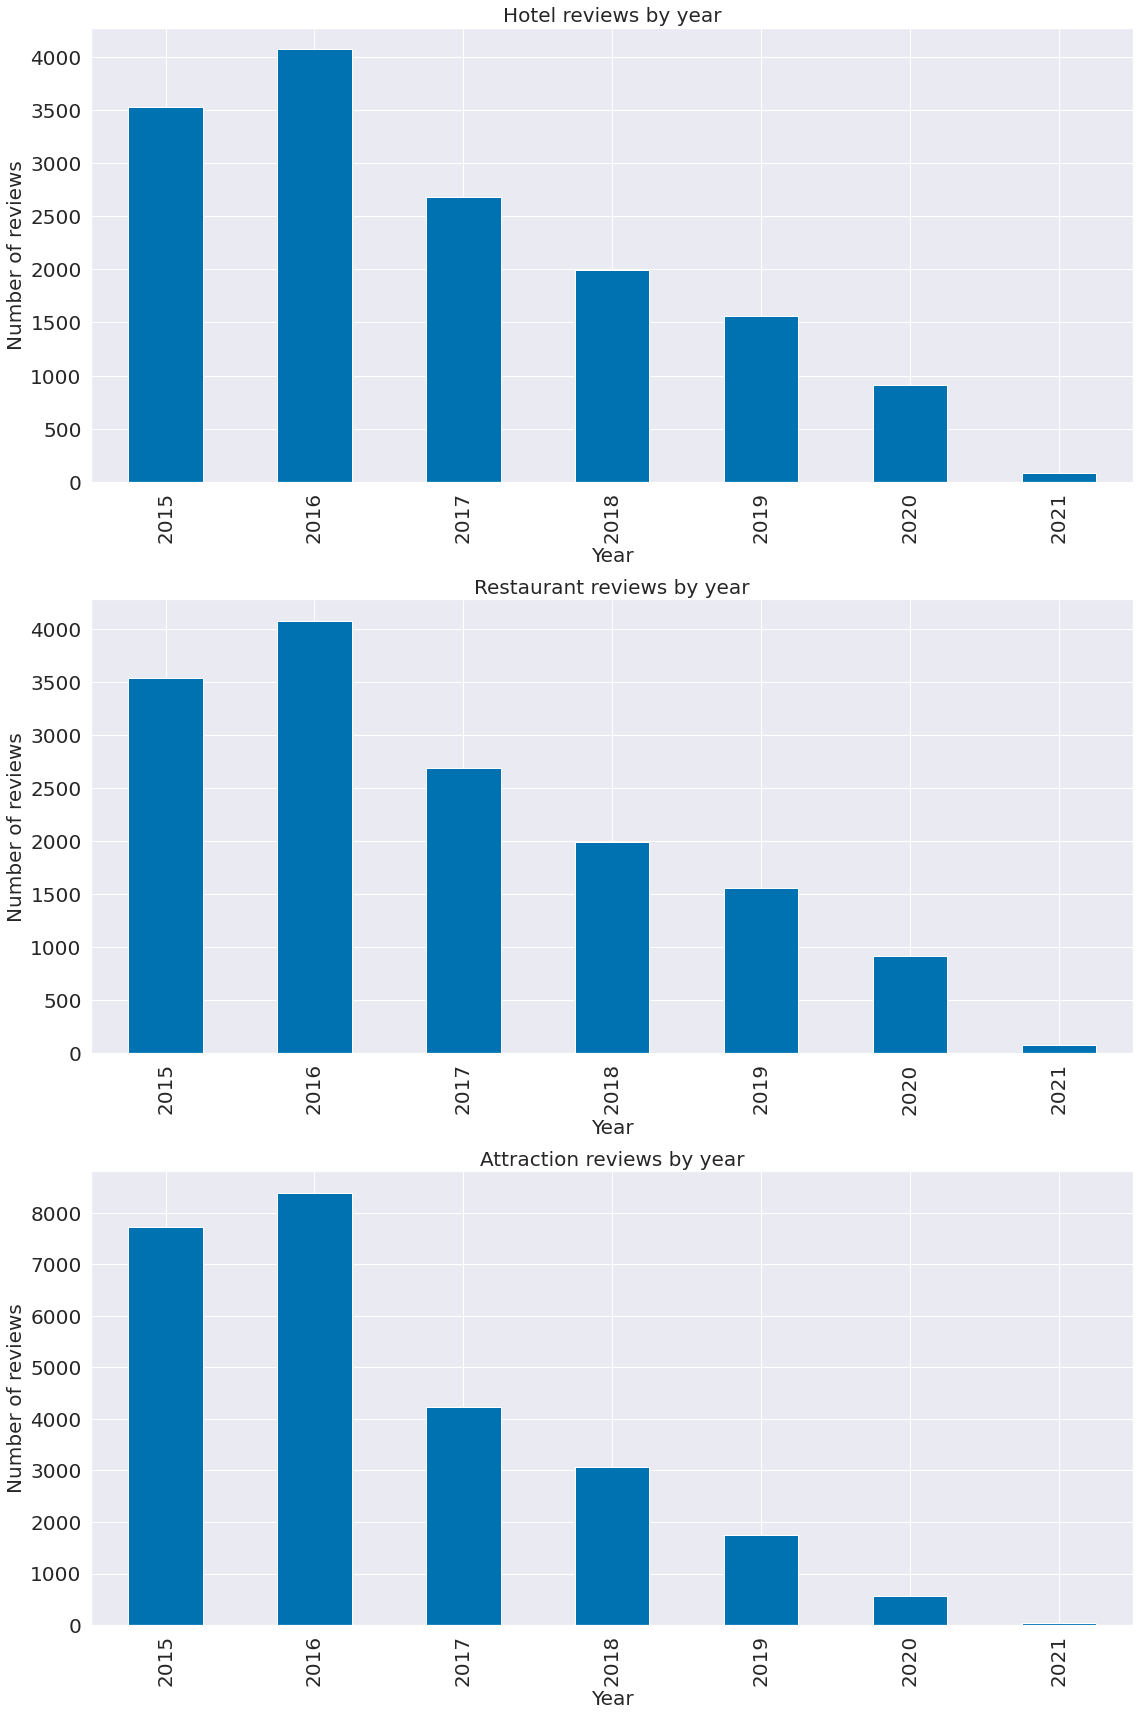

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16, 24))

comentarios_por_ano_hoteis.plot(ax=ax1, kind='bar')
ax1.set(xlabel='Year', ylabel='Number of reviews')
ax1.set_title("Hotel reviews by year")
comentarios_por_ano_restaurantes.plot(ax=ax2, kind='bar')
ax2.set(xlabel='Year', ylabel='Number of reviews')
ax2.set_title("Restaurant reviews by year")
comentarios_por_ano_atracoes.plot(ax=ax3, kind='bar')
ax3.set(xlabel='Year', ylabel='Number of reviews')
ax3.set_title("Attraction reviews by year")

plt.tight_layout()
plt.savefig('graficos/en-grafico3.png')

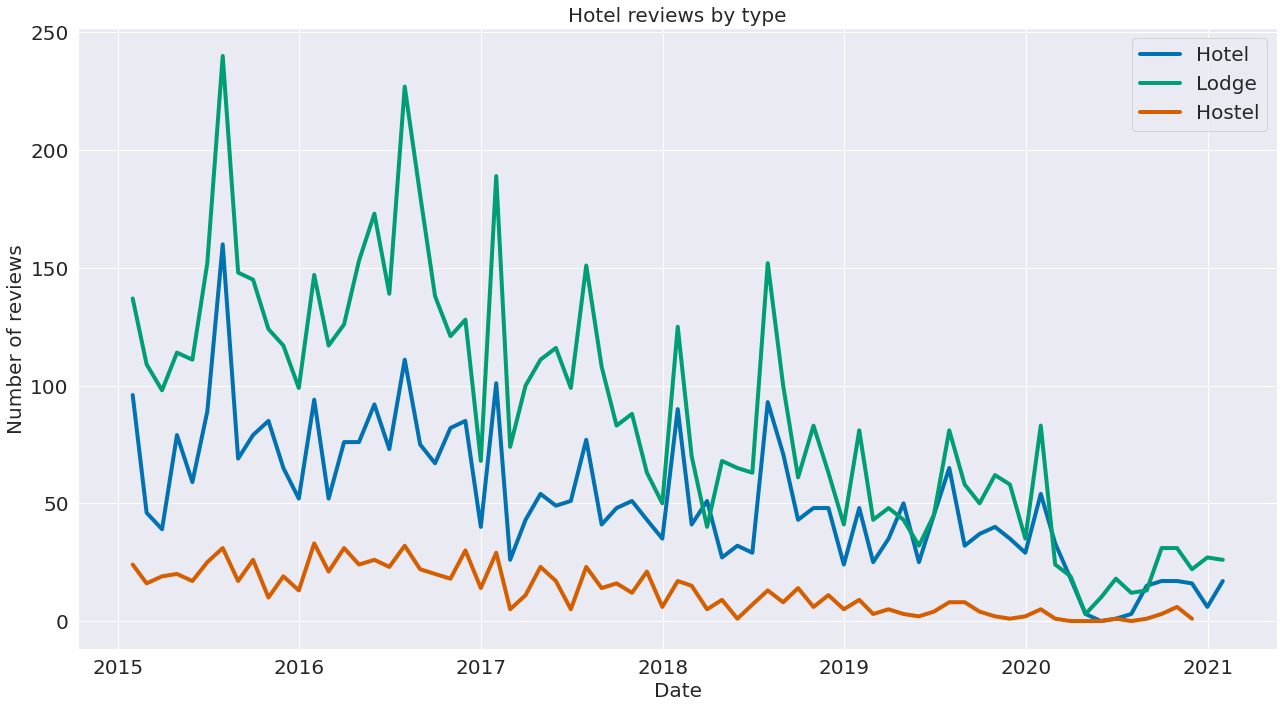

In [26]:
merged_df = pd.merge(hoteis, avaliacoes_hoteis_recentes, how='inner', left_on='hotel_id', right_on='estabelecimento')

avaliacoes_tipo_hotel = merged_df[merged_df['tipo'] == 'Hotel']
avaliacoes_tipo_pousada = merged_df[merged_df['tipo'] == 'Pousada']
avaliacoes_tipo_hostel = merged_df[merged_df['tipo'] == 'Hostel']

plt.figure(figsize=(18,10))
#plt.plot(avaliacoes_tipo_hotel.groupby('data_avaliacao')['estabelecimento'].count())
plt.plot(avaliacoes_tipo_hotel.set_index('data_avaliacao')['estabelecimento'].resample('M').count())
#plt.plot(avaliacoes_tipo_pousada.groupby('data_avaliacao')['estabelecimento'].count())
plt.plot(avaliacoes_tipo_pousada.set_index('data_avaliacao')['estabelecimento'].resample('M').count())
#plt.plot(avaliacoes_tipo_hostel.groupby('data_avaliacao')['estabelecimento'].count())
plt.plot(avaliacoes_tipo_hostel.set_index('data_avaliacao')['estabelecimento'].resample('M').count())

plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.title('Hotel reviews by type')
plt.legend(['Hotel', 'Lodge', 'Hostel'])
plt.tight_layout()
plt.savefig('graficos/en-grafico4.png')

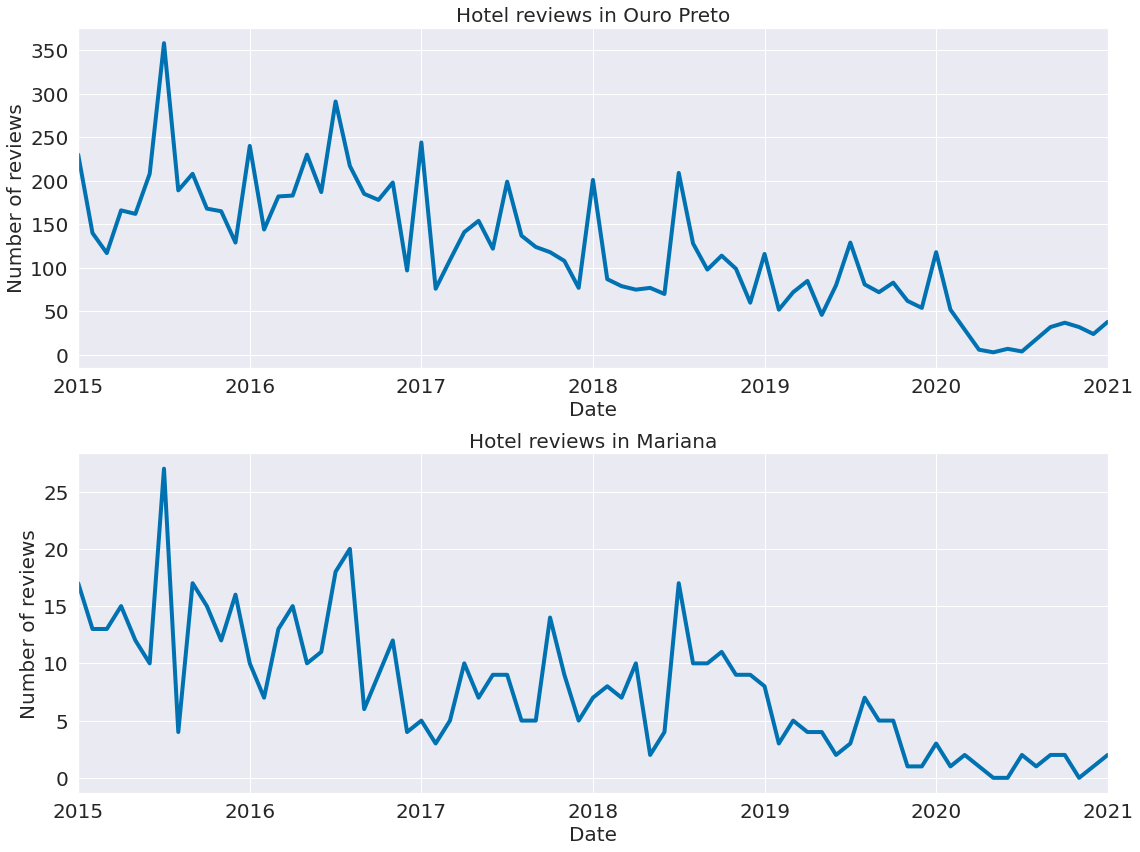

In [27]:
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteis_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
#avaliacoes_hoteis_ouro_preto.groupby('data_avaliacao')['estabelecimento'].count().plot(ax=ax1)
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Hotel reviews in Ouro Preto')
avaliacoes_hoteis_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Hotel reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico5.png')

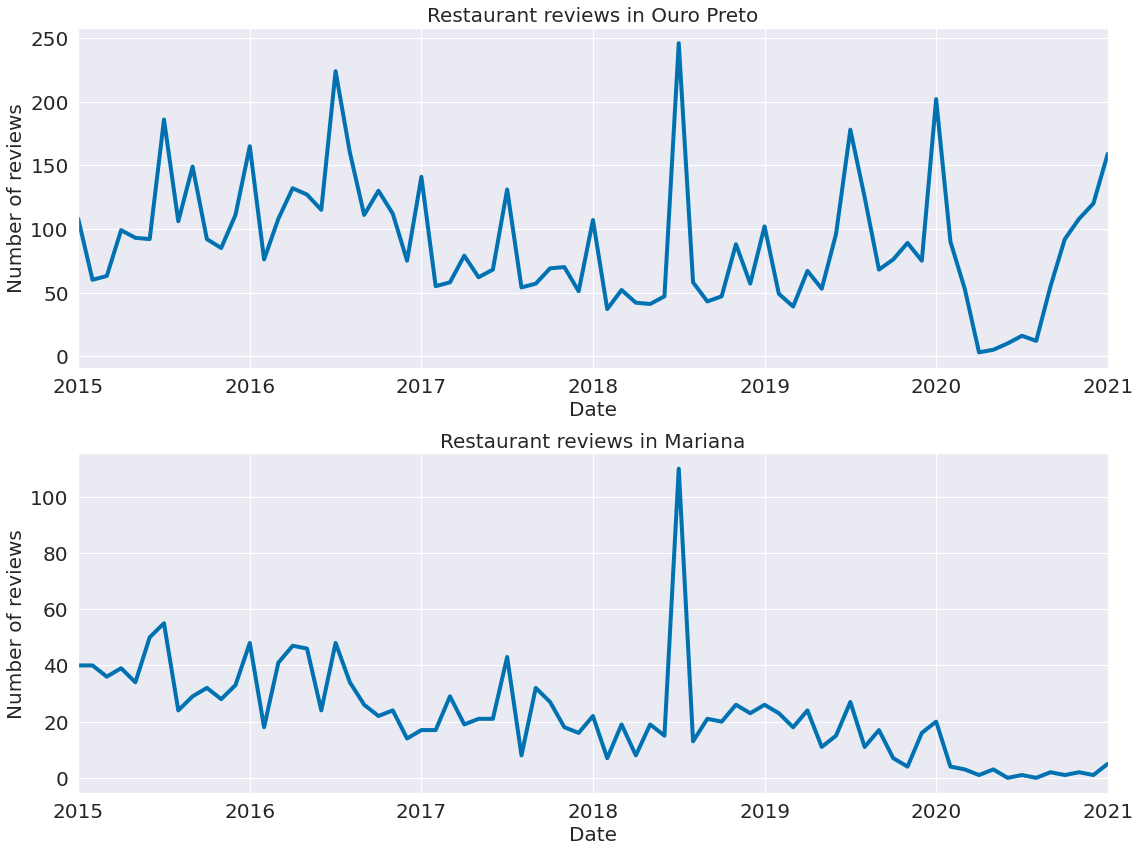

In [28]:
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_recentes, how='inner', left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Restaurant reviews in Ouro Preto')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Restaurant reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico6.png')

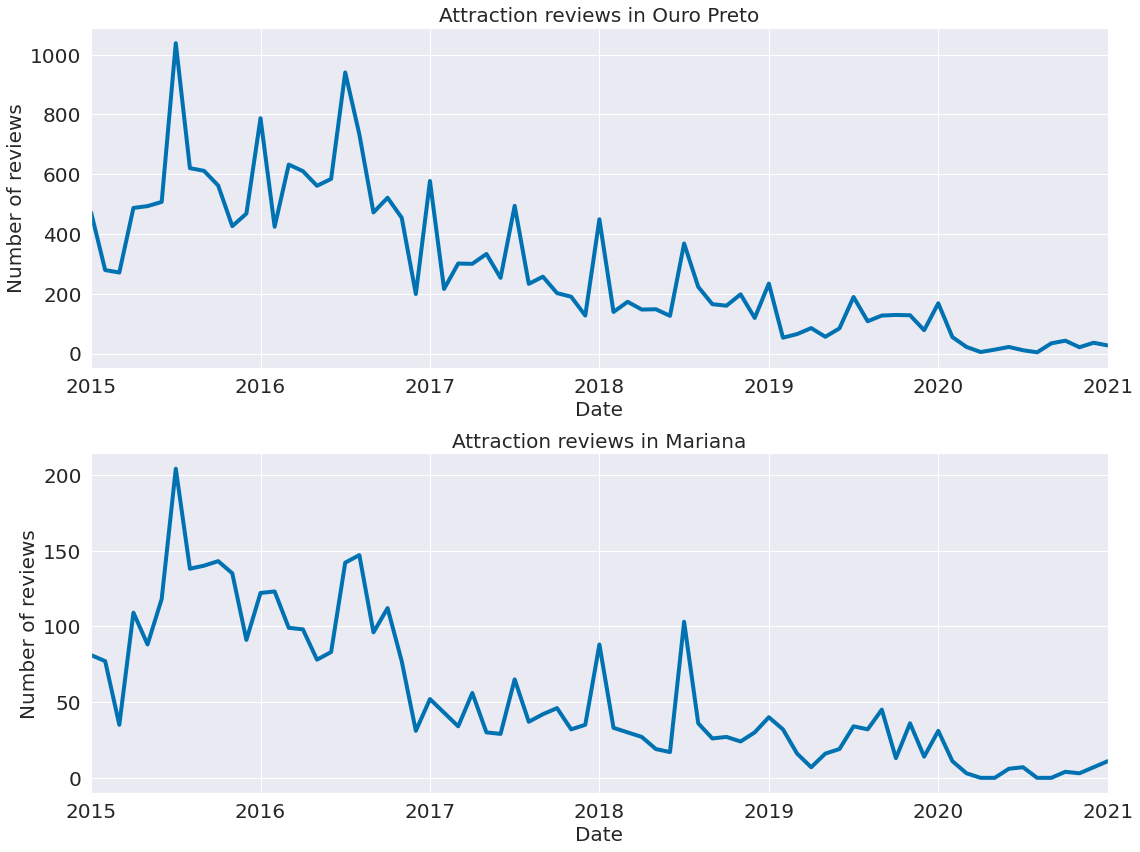

In [29]:
merged_df = pd.merge(atracoes, avaliacoes_atracoes_recentes, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction reviews in Ouro Preto')
avaliacoes_atracoes_mariana.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico7.png')

<ipython-input-18-033d91acdcbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


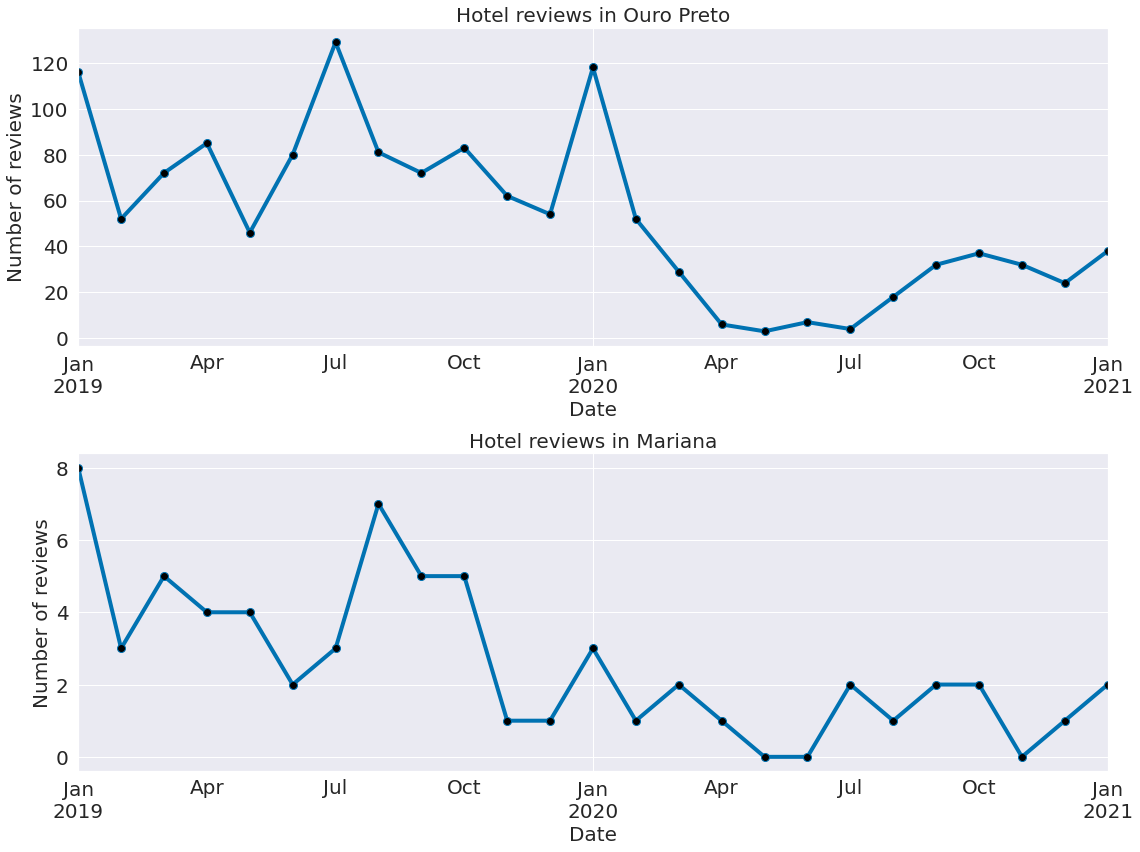

In [30]:
avaliacoes_hoteis_pandemia = get_recent_reviews(avaliacoes_hoteis, ano=2018)
merged_df = pd.merge(hoteis, avaliacoes_hoteis_pandemia, how='inner', left_on='hotel_id', right_on='estabelecimento')
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteis_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Hotel reviews in Ouro Preto')
avaliacoes_hoteis_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Hotel reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico8.png')

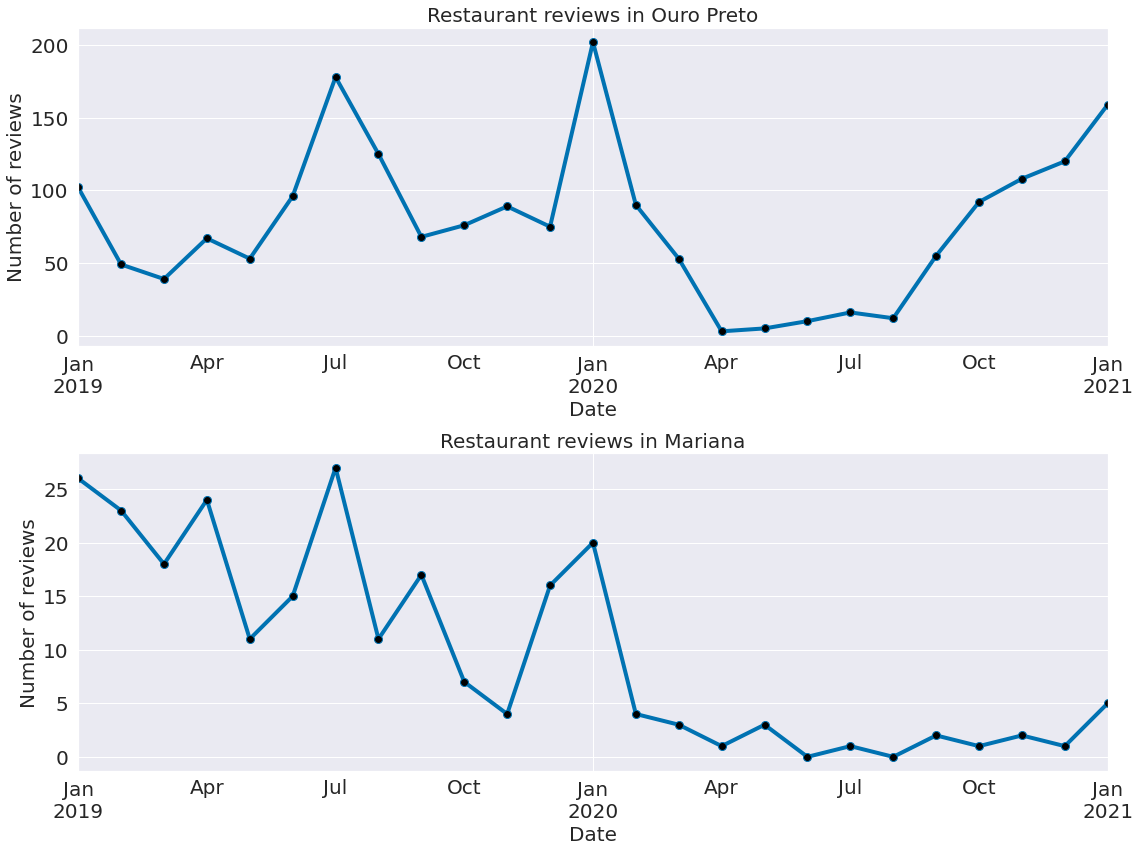

In [31]:
avaliacoes_restaurantes_pandemia = get_recent_reviews(avaliacoes_restaurantes, ano=2018)
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_pandemia, how='inner', left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Restaurant reviews in Ouro Preto')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Restaurant reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico9.png')

<ipython-input-18-033d91acdcbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


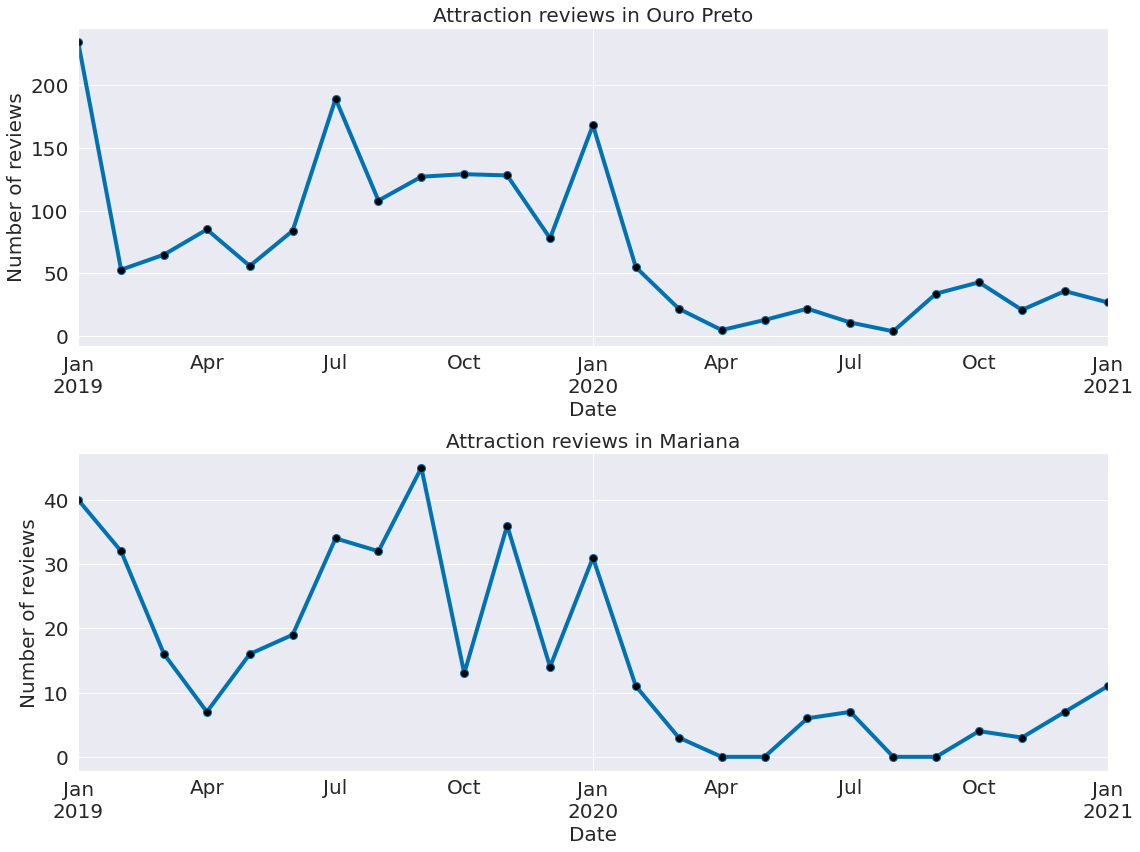

In [32]:
avaliacoes_atracoes_pandemia = get_recent_reviews(avaliacoes_atracoes, ano=2018)
merged_df = pd.merge(atracoes, avaliacoes_atracoes_pandemia, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction reviews in Ouro Preto')
avaliacoes_atracoes_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico10.png')